# HW093: 大方EDA產品與顧客分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline


pd.options.mode.copy_on_write = True
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
df = pd.read_csv('tafeng5000.csv').iloc[:, 1:]

df

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,1/7/2001,235419,30-34,115,110105,4710198221113,1,25,29
1,2/13/2001,1550900,35-39,115,590312,4710735405006,1,103,119
2,2/26/2001,909228,>65,115,110411,4710088414120,2,48,66
3,11/18/2000,1380231,30-34,221,130401,4710057870391,1,71,81
4,12/1/2000,1695595,45-49,221,530110,4710186161209,2,152,198
...,...,...,...,...,...,...,...,...,...
4995,12/26/2000,1573879,55-59,221,500806,26333005345,1,97,132
4996,2/3/2001,2090818,35-39,221,130205,4717332008883,1,75,95
4997,11/15/2000,198127,30-34,115,760229,733879271232,1,209,299
4998,2/16/2001,1637649,45-49,221,760637,4712552007333,1,24,35


## Part 1

資料匯入，並進行資料清理

進行資料敘述統計。

In [3]:
df.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.404782e+06,285985.238200,4.457093e+12,1.352800,102.443600,120.803000
std,8.061332e+05,227810.005443,1.687643e+12,1.043528,202.563897,227.340672
min,4.947000e+03,100101.000000,2.000920e+07,1.000000,3.000000,4.000000
25%,9.597838e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.590248e+06,130102.000000,4.710395e+12,1.000000,62.000000,75.000000
75%,1.848335e+06,520437.000000,4.712731e+12,1.000000,110.000000,129.000000
max,2.000200e+07,780510.000000,9.557615e+12,30.000000,9428.000000,9980.000000


檢查每個欄位有多少屬於 NULL。

In [4]:
df.isnull().sum()

TRANSACTION_DT        0
CUSTOMER_ID           0
AGE_GROUP           149
PIN_CODE              0
PRODUCT_SUBCLASS      0
PRODUCT_ID            0
AMOUNT                0
ASSET                 0
SALES_PRICE           0
dtype: int64

因為 AGE_GROUP 不是我們這次研究的目標，故直接移除這行就好。

In [5]:
del df["AGE_GROUP"]

df.isnull().sum()

TRANSACTION_DT      0
CUSTOMER_ID         0
PIN_CODE            0
PRODUCT_SUBCLASS    0
PRODUCT_ID          0
AMOUNT              0
ASSET               0
SALES_PRICE         0
dtype: int64

In [6]:
df.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.404782e+06,285985.238200,4.457093e+12,1.352800,102.443600,120.803000
std,8.061332e+05,227810.005443,1.687643e+12,1.043528,202.563897,227.340672
min,4.947000e+03,100101.000000,2.000920e+07,1.000000,3.000000,4.000000
25%,9.597838e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.590248e+06,130102.000000,4.710395e+12,1.000000,62.000000,75.000000
75%,1.848335e+06,520437.000000,4.712731e+12,1.000000,110.000000,129.000000
max,2.000200e+07,780510.000000,9.557615e+12,30.000000,9428.000000,9980.000000


## Part 2

請依月時間計算訂單數量趨勢圖，並以長條圖畫出。

In [7]:
df["TRANSACTION_DT"] = pd.to_datetime(df["TRANSACTION_DT"])

df

,TRANSACTION_DT,CUSTOMER_ID,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,2001-01-07,235419,115,110105,4710198221113,1,25,29
1,2001-02-13,1550900,115,590312,4710735405006,1,103,119
2,2001-02-26,909228,115,110411,4710088414120,2,48,66
3,2000-11-18,1380231,221,130401,4710057870391,1,71,81
4,2000-12-01,1695595,221,530110,4710186161209,2,152,198
...,...,...,...,...,...,...,...,...
4995,2000-12-26,1573879,221,500806,26333005345,1,97,132
4996,2001-02-03,2090818,221,130205,4717332008883,1,75,95
4997,2000-11-15,198127,115,760229,733879271232,1,209,299
4998,2001-02-16,1637649,221,760637,4712552007333,1,24,35


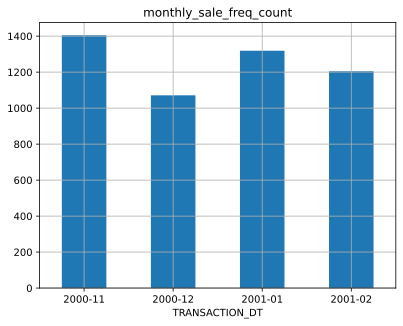

In [8]:
from typing import cast
from pandas import DatetimeIndex

product_count_df = df.resample("ME", on="TRANSACTION_DT")["PRODUCT_ID"].count()
product_count_df.index = cast(DatetimeIndex, product_count_df.index).strftime('%Y-%m')

ax = plt.subplot()
ax.set_title("monthly_sale_freq_count")

product_count_df.plot.bar(ax=ax, grid=True)
ax.tick_params(axis='x', rotation=0)

plt.show()

## Part 3

請依月時間計算銷售額趨勢圖，並以長條圖畫出。

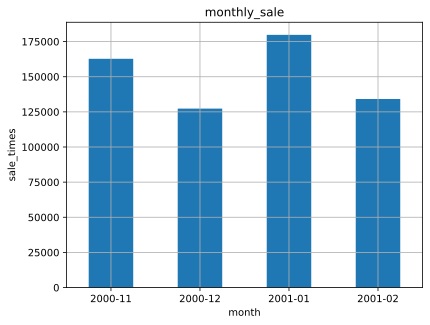

In [9]:
product_count_df = df.resample("ME", on="TRANSACTION_DT")["SALES_PRICE"].sum()
product_count_df.index = cast(DatetimeIndex, product_count_df.index).strftime('%Y-%m')

ax = plt.subplot()
ax.set_title("monthly_sale")

product_count_df.plot(kind="bar", ylabel="sale_times", xlabel="month", ax=ax, grid=True)
ax.tick_params(axis='x', rotation=0)

plt.show()

## Part 4

請依月時間計算回頭客數量以及百分比，並畫出現有顧客以及回頭客的數量以及百分比。

當月有重複購買視為回頭客。

In [10]:
monthly_repeated_customer_df = (
    df.groupby([pd.Grouper(key="TRANSACTION_DT", freq="ME"), "CUSTOMER_ID"])
    .filter(lambda x: len(x) > 1)
    .resample("ME", on="TRANSACTION_DT")["CUSTOMER_ID"]
    .count()
)

monthly_unique_customers_df = df.resample("ME", on="TRANSACTION_DT")["CUSTOMER_ID"].nunique()

monthly_repeated_percentage_df = (monthly_repeated_customer_df / monthly_unique_customers_df).fillna(0)

monthly_stats_df = pd.DataFrame({
    "Repeated Customers": monthly_repeated_customer_df,
    "All Customers": monthly_unique_customers_df,
    "Percentage of Repeat": monthly_repeated_percentage_df.mul(100)
})
monthly_stats_df.index = cast(DatetimeIndex, monthly_stats_df.index).strftime('%Y-%m')

monthly_stats_df

,Repeated Customers,All Customers,Percentage of Repeat
TRANSACTION_DT,,,
2000-11,205,1298,15.793529
2000-12,128,1002,12.774451
2001-01,196,1216,16.118421
2001-02,137,1135,12.070485


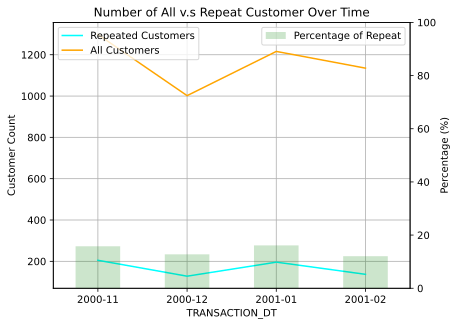

In [11]:
fig, ax = plt.subplots()
ax.set_title("Number of All v.s Repeat Customer Over Time")

monthly_stats_df.plot(y="Repeated Customers", ax=ax, color="cyan")
monthly_stats_df.plot(y="All Customers", ax=ax, color="orange", grid=True)
ax.set_ylabel("Customer Count")
ax.legend(loc="upper left")

ax2 = ax.twinx()
monthly_stats_df.plot.bar(y="Percentage of Repeat", ax=ax2, color="green", alpha=0.2)
ax2.set_ylabel('Percentage (%)')
ax2.legend(loc="upper right")
ax2.set_ylim(0, 100)

plt.show()

## Part 5

請計算前五項「銷售金額最高」商品隨著月時間的成長數，並以折線圖畫出

In [12]:
top5_product_df = df.groupby("PRODUCT_ID")["SALES_PRICE"].sum().nlargest(5)

top5_product_df.to_frame()

,SALES_PRICE
PRODUCT_ID,
4719864060018,9980
729238191921,5130
8712045008539,4592
4909978112950,3600
4710057254474,2916


In [13]:
top5_time_series_sales_count = df.groupby(
    ["PRODUCT_ID", pd.Grouper(key="TRANSACTION_DT", freq="ME")]
)["SALES_PRICE"].sum().loc[top5_product_df.index]

top5_time_series_sales_count.to_frame()

SALES_PRICE
PRODUCT_ID    TRANSACTION_DT             
4719864060018 2000-12-31             9980
729238191921  2000-11-30             5130
8712045008539 2000-12-31             2612
              2001-01-31             1980
4909978112950 2001-01-31             3600
4710057254474 2000-12-31              729
              2001-01-31             2187

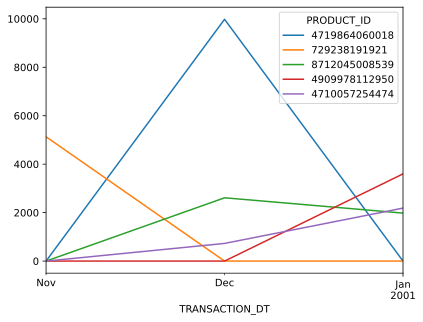

In [14]:
top5_time_series_sales_count.unstack(fill_value=0).T.sort_index().plot()
plt.show()

## Part 6

計算每位顧客的銷售額（最小值、最大值、總和、平均值）以及購買時間相關資料（最小值、最大值、購買時長、購買頻率）。 

In [15]:
customers_sales = df.groupby("CUSTOMER_ID")["SALES_PRICE"].aggregate(
    buy_min="min",
    buy_max="max",
    buy_sum="sum",
    buy_mean="mean"
)

customers_sales

,buy_min,buy_max,buy_sum,buy_mean
CUSTOMER_ID,,,,
4947,19,19,19,19.0
7795,21,242,263,131.5
13697,79,79,79,79.0
18173,85,85,85,85.0
19897,222,222,222,222.0
...,...,...,...,...
2178448,115,115,115,115.0
2179230,29,29,29,29.0
2179513,289,289,289,289.0


In [16]:
customers_purchase_period = df.groupby("CUSTOMER_ID")["TRANSACTION_DT"].agg(
    period_min="min",
    period_max="max",
    interval=lambda v: v.max() - v.min(),
    frequency="count"
)

customers_purchase_period

,period_min,period_max,interval,frequency
CUSTOMER_ID,,,,
4947,2000-12-10,2000-12-10,0 days,1
7795,2000-11-29,2000-11-29,0 days,2
13697,2000-12-11,2000-12-11,0 days,1
18173,2001-02-20,2001-02-20,0 days,1
19897,2000-12-20,2000-12-20,0 days,1
...,...,...,...,...
2178448,2001-02-24,2001-02-24,0 days,1
2179230,2001-02-27,2001-02-27,0 days,1
2179513,2001-02-28,2001-02-28,0 days,1


In [17]:
customers_stats = pd.concat([customers_sales, customers_purchase_period], axis=1)

customers_stats

,buy_min,buy_max,buy_sum,buy_mean,period_min,period_max,interval,frequency
CUSTOMER_ID,,,,,,,,
4947,19,19,19,19.0,2000-12-10,2000-12-10,0 days,1
7795,21,242,263,131.5,2000-11-29,2000-11-29,0 days,2
13697,79,79,79,79.0,2000-12-11,2000-12-11,0 days,1
18173,85,85,85,85.0,2001-02-20,2001-02-20,0 days,1
19897,222,222,222,222.0,2000-12-20,2000-12-20,0 days,1
...,...,...,...,...,...,...,...,...
2178448,115,115,115,115.0,2001-02-24,2001-02-24,0 days,1
2179230,29,29,29,29.0,2001-02-27,2001-02-27,0 days,1
2179513,289,289,289,289.0,2001-02-28,2001-02-28,0 days,1


## Part 7

畫出顧客購買次數分佈圖 (長條圖)。 


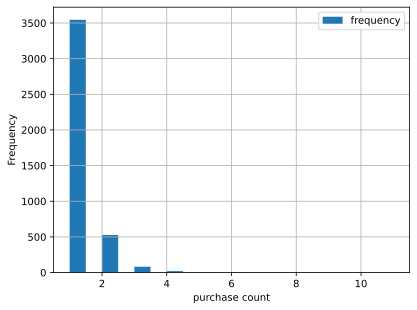

In [18]:
customers_stats.plot(kind="hist", y="frequency", bins=20, grid=True, xlabel="purchase count")

plt.show()

## Part 8

畫出平均下單間隔時間分佈圖。

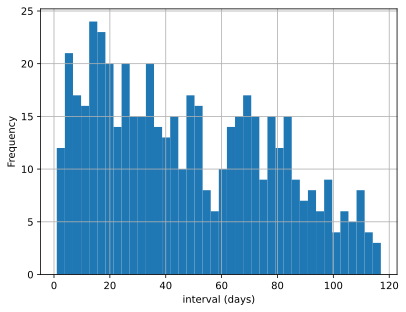

In [19]:
customers_stats[customers_stats["interval"].dt.days > 0]["interval"].dt.days.plot(
    xlabel="interval (days)", kind="hist",
    bins=40, grid=True
)

plt.show()